##BERT##

Now let us try using BERT model and try doing prediction. Here we will be using Reason Bert for training.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/case_study_2_new/train_pos_neg_neu.csv')
test_data=pd.read_csv('/content/drive/MyDrive/case_study_2_new/test_pos_neg_neu.csv')
print(train_data.shape)
print(test_data.shape)

(21984, 7)
(5496, 7)


In [ ]:
combined_train=train_data[['text','selected_text','sentiment']]
combined_test=test_data[['text','selected_text','sentiment']]

In [ ]:
combined_train=combined_train.sample(frac=1)
combined_test=combined_test.sample(frac=1)

In [ ]:
print(combined_train.shape)
print(combined_test.shape)

(21984, 3)
(5496, 3)


In [ ]:
X_train=combined_train
X_test=combined_test

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 32.0 MB/s 
     |████████████████████████████████| 7.6 MB 53.5 MB/s 
     |████████████████████████████████| 163 kB 66.8 MB/s 


In [ ]:
import transformers

In [ ]:
from transformers import TFBertForQuestionAnswering
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('osunlp/ReasonBERT-RoBERTa-base')
roberta_model=TFBertForQuestionAnswering.from_pretrained('osunlp/ReasonBERT-RoBERTa-base',from_pt=True,output_hidden_states=True)

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/327 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForQuestionAnswering: ['embeddings.position_ids']
- This IS expected if you are initializing TFBertForQuestionAnswering from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForQuestionAnswering from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForQuestionAnswering were not initialized from the PyTorch model and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/case_study_2_new/bert_initializer_model/tokenizer')
roberta_model.save_pretrained('/content/drive/MyDrive/case_study_2_new/bert_initializer_model/roberta_model')

In [ ]:
print(X_train.iloc[0]['text'])
encoding_sample=tokenizer.encode(X_train.iloc[0]['text'])
print(encoding_sample)
decoding_sample=tokenizer.decode(encoding_sample)
print(decoding_sample)

http://twitpic.com/66xlm -  hate when my PARKED car gets hit
[0, 8166, 640, 17137, 405, 19017, 4, 175, 73, 4280, 1178, 462, 119, 111, 1437, 4157, 77, 127, 25061, 1691, 512, 1516, 478, 2]
<s>http://twitpic.com/66xlm -  hate when my PARKED car gets hit</s>


The above sentence is an example of how tokenization will be in BERT. As BERT is a pretrained network we need to rokenize words according to how it was tokeized when the architecture was trained initailly.

In [ ]:
print(tokenizer.encode('...'))
print(tokenizer.encode("'"))
print(tokenizer.encode("t"))
print(tokenizer.encode("here at work"))
print(tokenizer.encode("asprin"))

[0, 734, 2]
[0, 108, 2]
[0, 90, 2]
[0, 10859, 23, 173, 2]
[0, 281, 4862, 179, 2]


Here we can see when we encode the text each word is not encoded into a single token in all the cases. There are certain places where a word is split into certain number of tokens. So now let us see the maximum length of the whole corpus.

In [ ]:
max_length_roberta=0
length=[]
for i in range(len(X_train)):
  encoding_length=len(tokenizer.encode_plus(X_train.iloc[i]['text'],X_train.iloc[i]['sentiment'])['input_ids'])
  length.append(encoding_length)
  if encoding_length>max_length_roberta:
    max_length_roberta=encoding_length

In [ ]:
print('Max length of the text after ecoding in roberta:',max_length_roberta)

Max length of the text after ecoding in roberta: 105


In [ ]:
for i in range(0,101,25):
  print('The {}th percentile value is {}'.format(i,np.percentile(length,i)))

The 0th percentile value is 6.0
The 25th percentile value is 15.0
The 50th percentile value is 22.0
The 75th percentile value is 31.0
The 100th percentile value is 105.0


In [ ]:
for i in range(90,101,1):
  print('The {}th percentile value is {}'.format(i,np.percentile(length,i)))

The 90th percentile value is 37.0
The 91th percentile value is 38.0
The 92th percentile value is 38.0
The 93th percentile value is 39.0
The 94th percentile value is 40.0
The 95th percentile value is 40.0
The 96th percentile value is 41.0
The 97th percentile value is 42.0
The 98th percentile value is 44.0
The 99th percentile value is 46.0
The 100th percentile value is 105.0


In [ ]:
for i in np.linspace(99,100,11):
  print('The {}th percentile value is {}'.format(i,np.percentile(length,i)))

The 99.0th percentile value is 46.0
The 99.1th percentile value is 47.0
The 99.2th percentile value is 47.0
The 99.3th percentile value is 47.0
The 99.4th percentile value is 48.0
The 99.5th percentile value is 48.0
The 99.6th percentile value is 49.0
The 99.7th percentile value is 50.0
The 99.8th percentile value is 52.0
The 99.9th percentile value is 54.0
The 100.0th percentile value is 105.0


Here we can see that 99.9 percentage of ext have their length as 54. here we will define the maximum length to be 55.

In [ ]:
max_length_roberta=55

In [ ]:
X_train_bert_input_id=np.zeros((len(combined_train),max_length_roberta))#Variable to store id of the words
X_train_bert_mask=np.zeros((len(combined_train),max_length_roberta))#Variable to store mask of the words
y_train_start_token=np.zeros((len(combined_train),max_length_roberta))#Variable to store start index  of the tokenized word
y_train_end_token=np.zeros((len(combined_train),max_length_roberta))#Variable to store end index  of the tokenized word
from tqdm import tqdm
for i in tqdm(range(len(combined_train))):
  text=combined_train.iloc[i]['text']
  sentiment=combined_train.iloc[i]['sentiment']
  selec_text=combined_train.iloc[i]['selected_text']
  encoded=tokenizer.encode_plus(sentiment,text,max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  X_train_bert_input_id[i]=encoded['input_ids'][0][:max_length_roberta]
  X_train_bert_mask[i]=encoded['attention_mask'][0][:max_length_roberta]
  decoded_list=[]
  start_idx=text.find(selec_text)
  end_idx=start_idx+(len(selec_text)-1)
  if sentiment=='neutral':
    start_idx+=19 #Len of <s>neutral</s>  is 18
    end_idx+=19 #Len of <s>neutral</s>  is 18
  else:
    start_idx+=20 #Len of <s>positive/negative</s>  is 19
    end_idx+=20 #Len of <s>positive/negative</s>  is 19
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if start_idx<=cummulative_len:
      start_index=k
      break
    k=k+1
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if end_idx<=cummulative_len:
      end_index=k
      break
    k=k+1
  try:
    text_end_ind=list(encoded['input_ids'][0]).index(1)-1#to find the index position of </s> which is encoded as 2
  except:
    text_end_ind=max_length_roberta-1
  if end_index>=text_end_ind: #Some of the word index location goes beyond </s>. To such words we give end index to be the index before that of </s>
    end_index=text_end_ind-1
  y_train_start_token[i][start_index]=1
  y_train_end_token[i][end_index]=1

100%|██████████| 21984/21984 [05:58<00:00, 61.36it/s]


In [ ]:
print("Sample of tokenization and target setting in BERT")
for i in range(5):
  print(i+1)
  d_l=[]
  print('Text:' )
  print(combined_train.iloc[i]['text'])
  print('Selected text')
  print(combined_train.iloc[i]['selected_text'])
  encoded_tr=tokenizer.encode_plus(combined_train.iloc[i]['sentiment'],combined_train.iloc[i]['text'],max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  for s in encoded_tr['input_ids'][0]:
    d_l.append(tokenizer.decode(s))
  print("Tokenization: ")
  print(d_l)
  print("Input id: ")
  print(X_train_bert_input_id[i])
  print("Mask: ")
  print(X_train_bert_mask[i])
  print("Start token array: ")
  print(y_train_start_token[i])
  print('End token array: ')
  print(y_train_end_token[i])
  print('**********'*10)

Sample of tokenization and target setting in BERT
1
Text:
 - for all dad is doing like this to his son/daughter love
Selected text
love
Tokenization: 
['<s>', 'positive', '</s>', '</s>', ' -', ' for', ' all', ' dad', ' is', ' doing', ' like', ' this', ' to', ' his', ' son', '/', 'daughter', ' love', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
Input id: 
[0.0000e+00 2.2173e+04 2.0000e+00 2.0000e+00 1.1100e+02 1.3000e+01
 7.0000e+01 4.2520e+03 1.6000e+01 6.0800e+02 1.0100e+02 4.2000e+01
 7.0000e+00 3.9000e+01 9.7900e+02 7.3000e+01 2.6243e+04 6.5700e+02
 2.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+0

In [ ]:
X_test_bert_input_id=np.zeros((len(combined_test),max_length_roberta))
X_test_bert_mask=np.zeros((len(combined_test),max_length_roberta))
y_test_start_token=np.zeros((len(combined_test),max_length_roberta))
y_test_end_token=np.zeros((len(combined_test),max_length_roberta))
from tqdm import tqdm
for i in tqdm(range(len(combined_test))):
  text=combined_test.iloc[i]['text']
  sentiment=combined_test.iloc[i]['sentiment']
  selec_text=combined_test.iloc[i]['selected_text']
  encoded=tokenizer.encode_plus(sentiment,text,max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  X_test_bert_input_id[i]=encoded['input_ids'][0][:max_length_roberta]
  X_test_bert_mask[i]=encoded['attention_mask'][0][:max_length_roberta]
  decoded_list=[]
  start_idx=text.find(selec_text)
  end_idx=start_idx+(len(selec_text)-1)
  if sentiment=='neutral':
    start_idx+=19 #Len of <s>neutral</s>  is 18
    end_idx+=19 #Len of <s>neutral</s>  is 18
  else:
    start_idx+=20 #Len of <s>positive/negative</s>  is 19
    end_idx+=20 #Len of <s>positive/negative</s> is 19
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if start_idx<=cummulative_len:
      start_index=k
      break
    k=k+1
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if end_idx<=cummulative_len:
      end_index=k
      break
    k=k+1
  try:
    text_end_ind=list(encoded['input_ids'][0]).index(1)-1#to find the index position of </s> which is encoded as 2
  except:
    text_end_ind=max_length_roberta-1
  if end_index>=text_end_ind: #Some of the word index location goes beyond </s>. To such words we give end index to be the index before that of </s>
    end_index=text_end_ind-1
  y_test_start_token[i][start_index]=1
  y_test_end_token[i][end_index]=1

100%|██████████| 5496/5496 [01:34<00:00, 58.11it/s]


In [ ]:
d_l=[]
print(combined_test.iloc[i]['text'],'/n',combined_test.iloc[i]['selected_text'])
encoded_tr=tokenizer.encode_plus(combined_test.iloc[i]['sentiment'],combined_test.iloc[i]['text'],max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
for s in encoded_tr['input_ids'][0]:
  d_l.append(tokenizer.decode(s))
print(d_l)

_KittyKat hello new follower  haha!! how are ya? /n haha!
['<s>', 'positive', '</s>', '</s>', '_', 'K', 'itty', 'Kat', ' hello', ' new', ' follower', ' ', ' haha', '!!', ' how', ' are', ' ya', '?', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [ ]:
print(X_test_bert_input_id[i],X_test_bert_mask[i],y_test_start_token[i],y_test_end_token[i])

[0.0000e+00 2.2173e+04 2.0000e+00 2.0000e+00 1.2150e+03 5.3000e+02
 1.8308e+04 2.7029e+04 2.0760e+04 9.2000e+01 3.1744e+04 1.4370e+03
 4.6116e+04 1.2846e+04 1.4100e+02 3.2000e+01 1.3531e+04 1.1600e+02
 2.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 

In [ ]:
np.save('/content/X_test_bert_input_id',X_test_bert_input_id)
np.save('/content/X_test_bert_mask',X_test_bert_mask)
np.save('/content/y_test_start_token',y_test_start_token)
np.save('/content/y_test_end_token',y_test_end_token)

In [ ]:
np.save('/content/X_train_bert_input_id',X_train_bert_input_id)
np.save('/content/X_train_bert_mask',X_train_bert_mask)
np.save('/content/y_train_start_token',y_train_start_token)
np.save('/content/y_train_end_token',y_train_end_token)

In [ ]:
X_train_bert_input_id=np.load('/content/X_train_bert_input_id.npy')
X_train_bert_mask=np.load('/content/X_train_bert_mask.npy')
y_train_start_token=np.load('/content/y_train_start_token.npy')
y_train_end_token=np.load('/content/y_train_end_token.npy')

X_test_bert_input_id=np.load('/content/X_test_bert_input_id.npy')
X_test_bert_mask=np.load('/content/X_test_bert_mask.npy')
y_test_start_token=np.load('/content/y_test_start_token.npy')
y_test_end_token=np.load('/content/y_test_end_token.npy')

In [ ]:
print(X_train_bert_input_id.shape)
print(X_test_bert_input_id.shape)

(21984, 55)
(5496, 55)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Softmax,Dense,Activation,Dropout,Conv1D,Flatten,GRU
import tensorflow as tf

In [ ]:
from transformers import AutoTokenizer,TFAutoModel
tf.keras.backend.clear_session()
input1 = Input(shape=(max_length_roberta,),name='input_id',dtype=tf.int32)
input2 = Input(shape=(max_length_roberta,),name='attention_mask',dtype=tf.int32)
scores = roberta_model(input1,attention_mask=input2)
dropout1=Dropout(0.2)(scores.hidden_states[-1])
dropout2=Dropout(0.2)(scores.hidden_states[-1])
conv1=Conv1D(8,1)(dropout1)
conv2=Conv1D(8,1)(dropout2)
dropout3=Dropout(0.2)(conv1)
dropout4=Dropout(0.2)(conv2)
conv3=Conv1D(1,1)(dropout3)
conv4=Conv1D(1,1)(dropout4)

flatten1=Flatten()(conv3)
flatten2=Flatten()(conv4)
softmax1 = Activation('softmax')(flatten1)
softmax2 = Activation('softmax')(flatten2)

Here instead of taking the start and end logits of the model we are taking the output of the final layer form the bert. by doing so we tend to get the representation of words where the vector for each word will be 768 vectors. On top of these representations we have used Conv1D which will be trained during the training.

In [ ]:
model = Model(inputs=[input1,input2],outputs=[softmax1,softmax2])

In [ ]:
model1= Model(inputs=[input1,input2],outputs=[softmax1,softmax2])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_id (InputLayer)          [(None, 55)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 55)]         0           []                               
                                                                                                  
 tf_bert_for_question_answering  TFQuestionAnswering  124057346  ['input_id[0][0]',               
  (TFBertForQuestionAnswering)  ModelOutput(loss=No               'attention_mask[0][0]']         
                                ne, start_logits=(N                                               
                                one, 55),                                                     

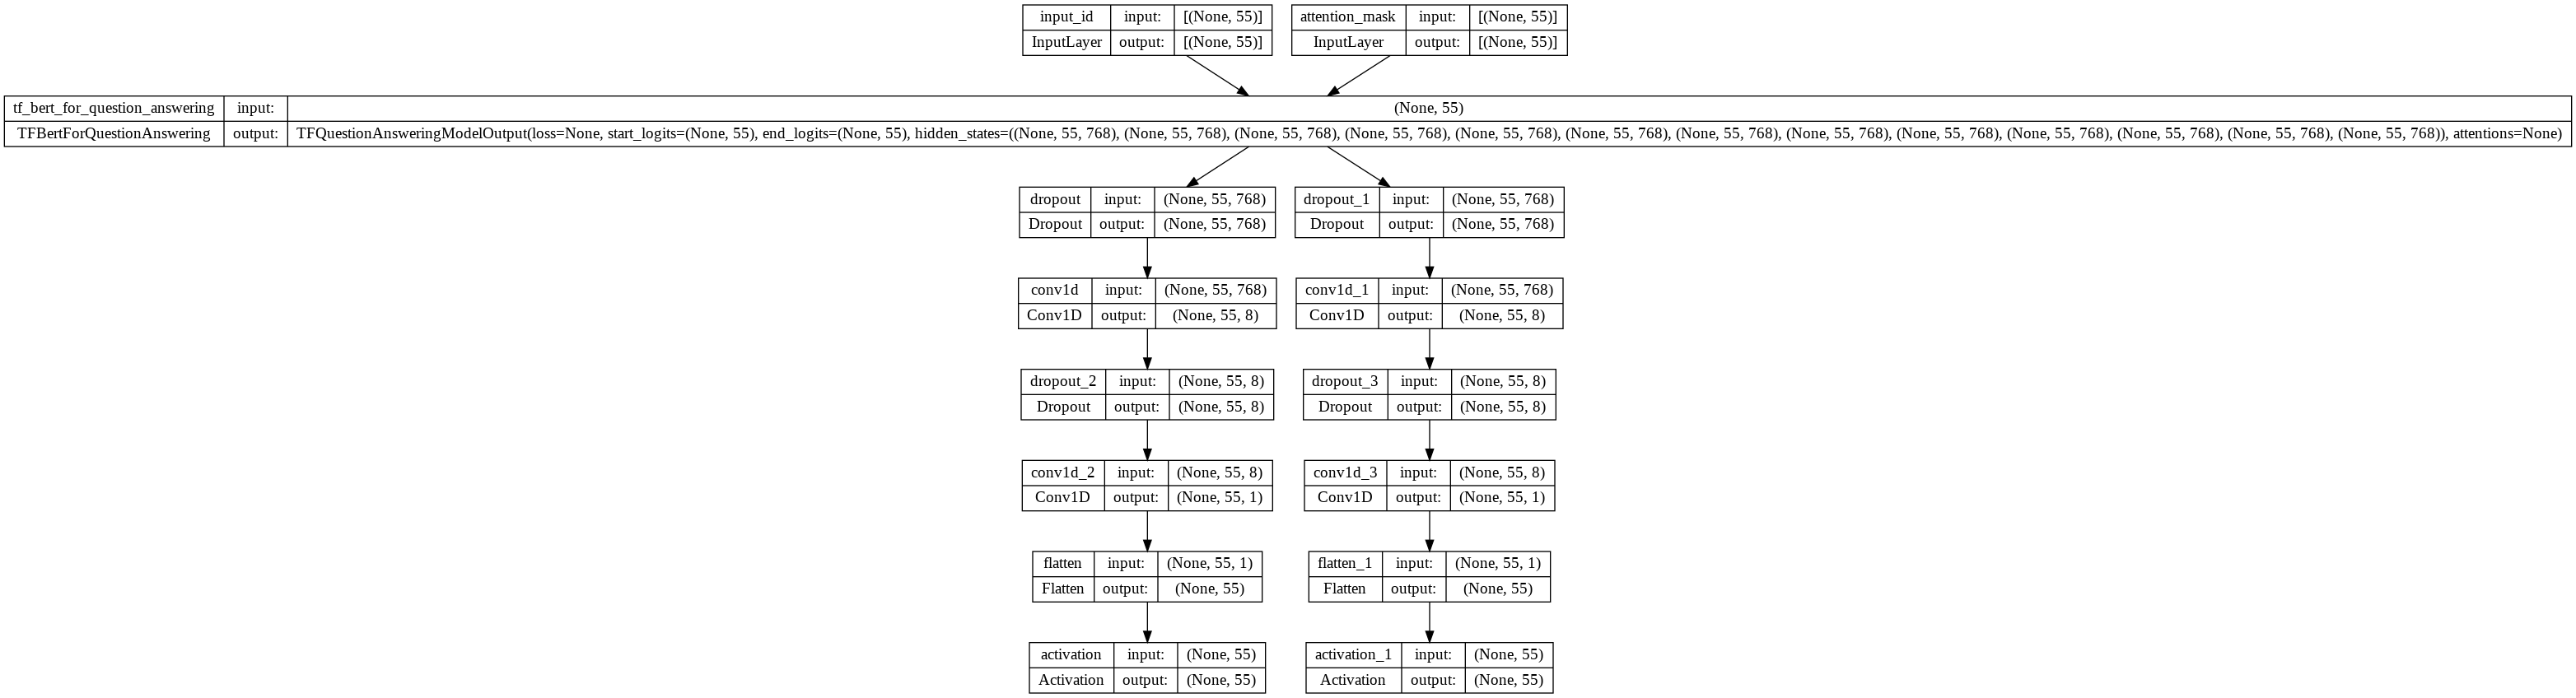

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, 'Model.png',show_shapes=True)

In [ ]:
input_data = (X_train_bert_input_id,X_train_bert_mask)
output_data = (y_train_start_token,y_train_end_token)

val = (X_test_bert_input_id,X_test_bert_mask)
output_val = (y_test_start_token,y_test_end_token)
val_data = (val,output_val)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
log_dir= "/content/drive/MyDrive/case_study_2_new/bert_TBlog1"
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=2,verbose=1,min_delta=0.01,min_lr=0.0000001)
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content',monitor='val_loss',verbose=1,save_best_only=True,save_weights=True)

model.compile(optimizer=opt,loss='categorical_crossentropy')

model.fit(input_data,output_data,epochs=10,validation_data=val_data,batch_size=16,callbacks=[model_checkpoint,reduce_lr],validation_batch_size=16)

Epoch 1/10


1374/1374 [==============================] - ETA: 0s - loss: 2.7981 - activation_loss: 1.3499 - activation_1_loss: 1.4482
Epoch 1: val_loss improved from inf to 2.00872, saving model to /content


1374/1374 [==============================] - 383s 266ms/step - loss: 2.7981 - activation_loss: 1.3499 - activation_1_loss: 1.4482 - val_loss: 2.0087 - val_activation_loss: 0.9828 - val_activation_1_loss: 1.0259 - lr: 1.0000e-05
Epoch 2/10
1374/1374 [==============================] - ETA: 0s - loss: 2.0104 - activation_loss: 0.9794 - activation_1_loss: 1.0310
Epoch 2: val_loss improved from 2.00872 to 1.89832, saving model to /content


1374/1374 [==============================] - 358s 261ms/step - loss: 2.0104 - activation_loss: 0.9794 - activation_1_loss: 1.0310 - val_loss: 1.8983 - val_activation_loss: 0.9133 - val_activation_1_loss: 0.9851 - lr: 1.0000e-05
Epoch 3/10
1374/1374 [==============================] - ETA: 0s - loss: 1.9293 - activation_loss: 0.9038 - activation_1_loss: 1.0256
Epoch 3: val_loss improved from 1.89832 to 1.82921, saving model to /content


1374/1374 [==============================] - 358s 260ms/step - loss: 1.9293 - activation_loss: 0.9038 - activation_1_loss: 1.0256 - val_loss: 1.8292 - val_activation_loss: 0.8943 - val_activation_1_loss: 0.9349 - lr: 1.0000e-05
Epoch 4/10
1374/1374 [==============================] - ETA: 0s - loss: 1.7045 - activation_loss: 0.8288 - activation_1_loss: 0.8757
Epoch 4: val_loss improved from 1.82921 to 1.76323, saving model to /content


1374/1374 [==============================] - 359s 261ms/step - loss: 1.7045 - activation_loss: 0.8288 - activation_1_loss: 0.8757 - val_loss: 1.7632 - val_activation_loss: 0.8676 - val_activation_1_loss: 0.8957 - lr: 1.0000e-05
Epoch 5/10
1374/1374 [==============================] - ETA: 0s - loss: 1.6007 - activation_loss: 0.7822 - activation_1_loss: 0.8186
Epoch 5: val_loss improved from 1.76323 to 1.75883, saving model to /content


1374/1374 [==============================] - 359s 261ms/step - loss: 1.6007 - activation_loss: 0.7822 - activation_1_loss: 0.8186 - val_loss: 1.7588 - val_activation_loss: 0.8623 - val_activation_1_loss: 0.8966 - lr: 1.0000e-05
Epoch 6/10
1374/1374 [==============================] - ETA: 0s - loss: 1.5022 - activation_loss: 0.7620 - activation_1_loss: 0.7402
Epoch 6: val_loss improved from 1.75883 to 1.68548, saving model to /content


1374/1374 [==============================] - 359s 261ms/step - loss: 1.5022 - activation_loss: 0.7620 - activation_1_loss: 0.7402 - val_loss: 1.6855 - val_activation_loss: 0.8461 - val_activation_1_loss: 0.8393 - lr: 1.0000e-05
Epoch 7/10
1374/1374 [==============================] - ETA: 0s - loss: 1.3779 - activation_loss: 0.7048 - activation_1_loss: 0.6732
Epoch 7: val_loss did not improve from 1.68548
1374/1374 [==============================] - 298s 217ms/step - loss: 1.3779 - activation_loss: 0.7048 - activation_1_loss: 0.6732 - val_loss: 1.7050 - val_activation_loss: 0.8762 - val_activation_1_loss: 0.8288 - lr: 1.0000e-05
Epoch 8/10
1374/1374 [==============================] - ETA: 0s - loss: 1.3057 - activation_loss: 0.6709 - activation_1_loss: 0.6349
Epoch 8: val_loss improved from 1.68548 to 1.67323, saving model to /content


1374/1374 [==============================] - 360s 262ms/step - loss: 1.3057 - activation_loss: 0.6709 - activation_1_loss: 0.6349 - val_loss: 1.6732 - val_activation_loss: 0.8563 - val_activation_1_loss: 0.8169 - lr: 1.0000e-05
Epoch 9/10
1374/1374 [==============================] - ETA: 0s - loss: 1.2080 - activation_loss: 0.6181 - activation_1_loss: 0.5899
Epoch 9: val_loss did not improve from 1.67323
1374/1374 [==============================] - 297s 216ms/step - loss: 1.2080 - activation_loss: 0.6181 - activation_1_loss: 0.5899 - val_loss: 1.8517 - val_activation_loss: 0.9470 - val_activation_1_loss: 0.9047 - lr: 1.0000e-05
Epoch 10/10
1374/1374 [==============================] - ETA: 0s - loss: 1.1044 - activation_loss: 0.5623 - activation_1_loss: 0.5420
Epoch 10: val_loss did not improve from 1.67323

Epoch 10: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
1374/1374 [==============================] - 298s 217ms/step - loss: 1.1044 - activation_loss: 0.5623 - 

In [ ]:
X_train_selec_bert_input_id=np.zeros((len(X_train),max_length_roberta))
X_train_selec_bert_mask=np.zeros((len(X_train),max_length_roberta))
y_train_selec_start_token=np.zeros((len(X_train),max_length_roberta))
y_train_selec_end_token=np.zeros((len(X_train),max_length_roberta))
from tqdm import tqdm
for i in tqdm(range(len(X_train))):
  text=X_train.iloc[i]['text']
  sentiment=X_train.iloc[i]['sentiment']
  selec_text=X_train.iloc[i]['selected_text']
  encoded=tokenizer.encode_plus(sentiment,text,max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  X_train_selec_bert_input_id[i]=encoded['input_ids'][0][:max_length_roberta]
  X_train_selec_bert_mask[i]=encoded['attention_mask'][0][:max_length_roberta]
  decoded_list=[]
  start_idx=text.find(selec_text)
  end_idx=start_idx+(len(selec_text)-1)
  start_idx+=20 #Len of <s>  is 3
  end_idx+=20 #Len of <s> is 3
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if start_idx<=cummulative_len:
      start_index=k
      break
    k=k+1
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if end_idx<=cummulative_len:
      end_index=k
      break
    k=k+1
  try:
    text_end_ind=list(encoded['input_ids'][0]).index(1)-1#to find the index position of </s> which is encoded as 2
  except:
    text_end_ind=max_length_roberta-1
  if end_index>=text_end_ind: #Some of the word index location goes beyond </s>. To such words we give end index to be the index before that of </s>
    end_index=text_end_ind-1
  y_train_selec_start_token[i][start_index]=1
  y_train_selec_end_token[i][end_index]=1

100%|██████████| 13090/13090 [05:27<00:00, 39.91it/s]


In [ ]:
X_test_selec_bert_input_id=np.zeros((len(X_test),max_length_roberta))
X_test_selec_bert_mask=np.zeros((len(X_test),max_length_roberta))
y_test_selec_start_token=np.zeros((len(X_test),max_length_roberta))
y_test_selec_end_token=np.zeros((len(X_test),max_length_roberta))
from tqdm import tqdm
for i in tqdm(range(len(X_test))):
  text=X_test.iloc[i]['text']
  sentiment=X_test.iloc[i]['sentiment']
  selec_text=X_test.iloc[i]['selected_text']
  encoded=tokenizer.encode_plus(sentiment,text,max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  X_test_selec_bert_input_id[i]=encoded['input_ids'][0][:max_length_roberta]
  X_test_selec_bert_mask[i]=encoded['attention_mask'][0][:max_length_roberta]
  decoded_list=[]
  start_idx=text.find(selec_text)
  end_idx=start_idx+(len(selec_text)-1)
  if sentiment!='neutral':
    start_idx+=20 #Len of <s>  is 3
    end_idx+=20 #Len of <s> is 3
  else:
    start_idx+=19
    end_idx+=19
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if start_idx<=cummulative_len:
      start_index=k
      break
    k=k+1
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if end_idx<=cummulative_len:
      end_index=k
      break
    k=k+1
  try:
    text_end_ind=list(encoded['input_ids'][0]).index(1)-1#to find the index position of </s> which is encoded as 2
  except:
    text_end_ind=max_length_roberta-1
  if end_index>=text_end_ind: #Some of the word index location goes beyond </s>. To such words we give end index to be the index before that of </s>
    end_index=text_end_ind-1
  y_test_selec_start_token[i][start_index]=1
  y_test_selec_end_token[i][end_index]=1
val_selec = (X_test_selec_bert_input_id,X_test_selec_bert_mask)

100%|██████████| 5496/5496 [01:37<00:00, 56.65it/s]


Let us check how does the model performs.

In [ ]:
start_test_pred,end_test_pred=model.predict(val_selec)#val_selec consist of tokenized data only for positive and negative sentences

172/172 [==============================] - 23s 132ms/step


In [ ]:
start_pred=np.argmax(start_test_pred,axis=-1)
end_pred=np.argmax(end_test_pred,axis=-1)

In [ ]:
y_test_pred_str=[]
y_test_actual_str=[]
for i in range(len(X_test)):
  text=X_test.iloc[i]['text']
  sentiment=X_test.iloc[i]['sentiment']
  selec_text=X_test.iloc[i]['selected_text']
  start_idx=start_pred[i]
  end_idx=end_pred[i]
  encoded=tokenizer.encode_plus(sentiment,text,max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  pred_text=tokenizer.decode(encoded['input_ids'][0][start_idx:end_idx+1])
  y_test_pred_str.append(pred_text)
  y_test_actual_str.append(selec_text)

In [ ]:
print(X_test.iloc[1]['text'])
print(y_test_pred_str[1])
print(y_test_actual_str[1])

_30439 I really wish I could go!
 I really wish
wish


In [ ]:
def jaccard(x,y):
    str1=x
    str2=y 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0):
        return 0.5
    c = a.intersection(b)
    
    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
jaccard_score=[]
for i in range(len(y_test_pred_str)):
  jaccard_score_indiv=jaccard(y_test_actual_str[i],y_test_pred_str[i])
  jaccard_score.append(jaccard_score_indiv)

In [ ]:
print('Overall Jaccard score:',np.array(jaccard_score).mean())

Overall Jaccard score: 0.6919481494183787


In [ ]:
X_test=combined_test[combined_test['sentiment']!='neutral']
X_test_selec_bert_input_id=np.zeros((len(X_test),max_length_roberta))
X_test_selec_bert_mask=np.zeros((len(X_test),max_length_roberta))
y_test_selec_start_token=np.zeros((len(X_test),max_length_roberta))
y_test_selec_end_token=np.zeros((len(X_test),max_length_roberta))
from tqdm import tqdm
for i in tqdm(range(len(X_test))):
  text=X_test.iloc[i]['text']
  sentiment=X_test.iloc[i]['sentiment']
  selec_text=X_test.iloc[i]['selected_text']
  encoded=tokenizer.encode_plus(sentiment,text,max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  X_test_selec_bert_input_id[i]=encoded['input_ids'][0][:max_length_roberta]
  X_test_selec_bert_mask[i]=encoded['attention_mask'][0][:max_length_roberta]
  decoded_list=[]
  start_idx=text.find(selec_text)
  end_idx=start_idx+(len(selec_text)-1)
  if sentiment!='neutral':
    start_idx+=20 #Len of <s>  is 3
    end_idx+=20 #Len of <s> is 3
  else:
    start_idx+=19
    end_idx+=19
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if start_idx<=cummulative_len:
      start_index=k
      break
    k=k+1
  k=0
  cummulative_len=0
  for s in encoded['input_ids'][0]:
    cummulative_len=cummulative_len+len(tokenizer.decode(s))
    if end_idx<=cummulative_len:
      end_index=k
      break
    k=k+1
  try:
    text_end_ind=list(encoded['input_ids'][0]).index(1)-1#to find the index position of </s> which is encoded as 2
  except:
    text_end_ind=max_length_roberta-1
  if end_index>=text_end_ind: #Some of the word index location goes beyond </s>. To such words we give end index to be the index before that of </s>
    end_index=text_end_ind-1
  y_test_selec_start_token[i][start_index]=1
  y_test_selec_end_token[i][end_index]=1
val_selec = (X_test_selec_bert_input_id,X_test_selec_bert_mask)

100%|██████████| 3273/3273 [01:04<00:00, 50.70it/s]


In [ ]:
start_test_pred,end_test_pred=model.predict(val_selec)#val_selec consist of tokenized data only for positive and negative sentences
start_pred=np.argmax(start_test_pred,axis=-1)
end_pred=np.argmax(end_test_pred,axis=-1)
y_test_pred_str=[]
y_test_actual_str=[]
for i in range(len(X_test)):
  text=X_test.iloc[i]['text']
  sentiment=X_test.iloc[i]['sentiment']
  selec_text=X_test.iloc[i]['selected_text']
  start_idx=start_pred[i]
  end_idx=end_pred[i]
  encoded=tokenizer.encode_plus(sentiment,text,max_length=max_length_roberta,return_attention_mask=True,padding='max_length',add_special_tokens=True,return_tensors='tf')
  pred_text=tokenizer.decode(encoded['input_ids'][0][start_idx:end_idx+1])
  y_test_pred_str.append(pred_text)
  y_test_actual_str.append(selec_text)
jaccard_score=[]
for i in range(len(y_test_pred_str)):
  jaccard_score_indiv=jaccard(y_test_actual_str[i],y_test_pred_str[i])
  jaccard_score.append(jaccard_score_indiv)

103/103 [==============================] - 13s 124ms/step


In [ ]:
print('Jaccard score on positive and negative sentences:',np.array(jaccard_score).mean())

Jaccard score on positive and negative sentences: 0.5089795741385807


In [ ]:
len(jaccard_score)

3273

In [ ]:
pos_neg_jaccard_score=jaccard_score.copy()

In [ ]:
neutral_jaccard_score=[]
test_neutral=combined_test[combined_test['sentiment']=='neutral']
for i in range(len(test_neutral)):
  actual_text=test_neutral.iloc[i]['text']
  actual_sel_text=test_neutral.iloc[i]['selected_text']
  jaccard_neut_indiv=jaccard(actual_sel_text,actual_text)
  neutral_jaccard_score.append(jaccard_neut_indiv)

In [ ]:
pos_neg_jaccard_score.extend(neutral_jaccard_score)

In [ ]:
len(pos_neg_jaccard_score)

5496

In [ ]:
print('Overall jaccard score :',np.array(pos_neg_jaccard_score).mean())

Overall jaccard score : 0.6973853411793608


This is the overall jaccard score where positive and negative sentences alone is predicted using the model but for neutral the text sentence will be the selected text.

Ftom the above we can see that the latter was giving even more better results than the former one.

In [ ]:
model.save_weights('/content/drive/MyDrive/case_study_2_new/bert_model/BERTmodel.hdf5')

In [ ]:
model.load_weights('/content/drive/MyDrive/case_study_2_new/bert_model/BERTmodel.hdf5')

We can see that bert model have done wonderful in predicting the positive and the negative sentiments. The jaccard score is 0.6973 for the test data.